<a href="https://colab.research.google.com/github/Howlbeeb/ML-Projects/blob/master/Pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn # neural network building blocks

## Using a linear regression formula to make a straight line with knmown ***parameters***

In [2]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias # y = a + bX

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X),len(y)

(50, 50)

In [4]:
train_split = int(0.8 *len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [15]:
import matplotlib.pyplot as plt
def plot_predictions(train_data= X_train,
                      train_labels= y_train,
                      test_data=X_test,
                      test_labels=y_test,
                      predictions = None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing data")

  if predictions is not None:
    plt.scatter(test_data,predictions,c='r',s=4.,label="Predictions")
  plt.legend(prop={"size":14})

##Creating a linear regression model

In [6]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float32 ))
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float32))

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.weights * x + self.bias

In [7]:
Random_Seed = 42
torch.manual_seed(Random_Seed)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [8]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [9]:
# Make predictions with model

with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

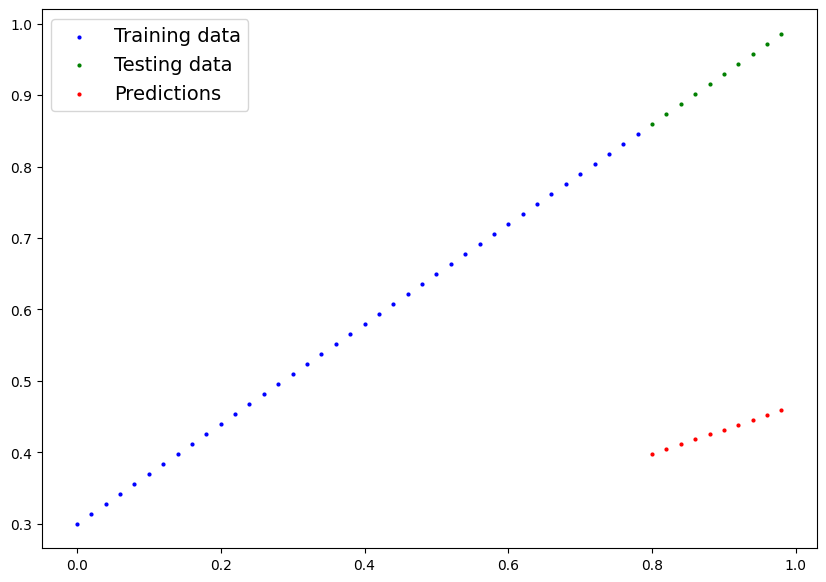

In [10]:
plot_predictions(predictions=y_preds)

In [11]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [12]:
# Setup a loss Function

loss_fn = nn.L1Loss()

# Setup a Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)

# Building a training loop (and a testing loop) in Pytorch

0. Loop through the data
1. Forward pass
2. Calculate the loss
3. Optimize zero grad
4. Loss backward (**backpropagation**)
5. Optimizer Step (**gradient descent**)

In [13]:
torch.manual_seed(42)
# An epoch is one loop through the data....
epochs = 200
epoch_count = []
loss_values = []
test_loss_values = []


#0 loop through the data
for epoch in range(epochs):
  # set model to traing mode
  model_0.train()

  #1. Forward pass
  y_pred = model_0(X_train)

  #2 calculate the loss
  loss = loss_fn(y_pred,y_train)
  #print(f"Loss{epoch}: {loss}")
  #3 Optimizer zero grad
  optimizer.zero_grad()

  #4 Loss backward perform backpropagation
  loss.backward()

  #5 Optimizer step
  optimizer.step()

### Testing
  model_0.eval() # turn off different settings not needed for evaluation
  with torch.inference_mode():
    #1. Forward  pass
    test_pred = model_0(X_test)

    #2. Calculate loss
    test_loss = loss_fn(test_pred,y_test)
  if epoch % 10 ==0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch:{epoch}|Loss:{loss} Test loss: {test_loss}")
    print(model_0.state_dict())

Epoch:0|Loss:0.31288138031959534 Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch:10|Loss:0.1976713240146637 Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch:20|Loss:0.08908725529909134 Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch:30|Loss:0.053148526698350906 Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch:40|Loss:0.04543796554207802 Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch:50|Loss:0.04167863354086876 Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch:60|Loss:0.03818932920694351 Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
Epoch:70|Loss:0.03476089984178543 Te

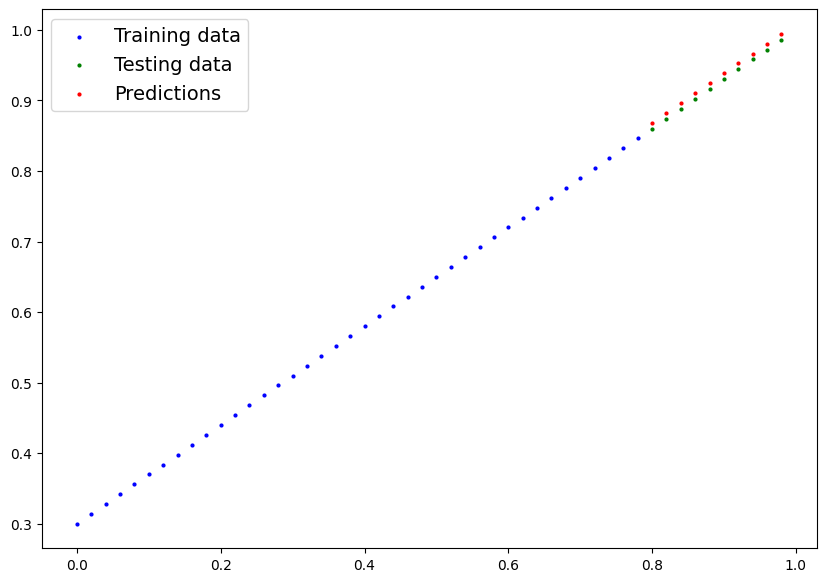

In [14]:
with torch.inference_mode():
  y_preds = model_0(X_test)
plot_predictions(predictions=y_preds)

In [15]:
variable_name = "" # @param {"type":"string"}
loss_values,test_loss_values

([tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.1977, grad_fn=<MeanBackward0>),
  tensor(0.0891, grad_fn=<MeanBackward0>),
  tensor(0.0531, grad_fn=<MeanBackward0>),
  tensor(0.0454, grad_fn=<MeanBackward0>),
  tensor(0.0417, grad_fn=<MeanBackward0>),
  tensor(0.0382, grad_fn=<MeanBackward0>),
  tensor(0.0348, grad_fn=<MeanBackward0>),
  tensor(0.0313, grad_fn=<MeanBackward0>),
  tensor(0.0279, grad_fn=<MeanBackward0>),
  tensor(0.0245, grad_fn=<MeanBackward0>),
  tensor(0.0210, grad_fn=<MeanBackward0>),
  tensor(0.0176, grad_fn=<MeanBackward0>),
  tensor(0.0142, grad_fn=<MeanBackward0>),
  tensor(0.0107, grad_fn=<MeanBackward0>),
  tensor(0.0073, grad_fn=<MeanBackward0>),
  tensor(0.0039, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>)],
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.08

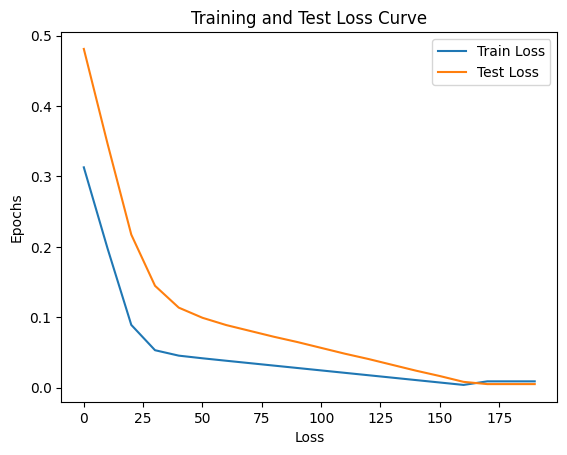

In [16]:
import numpy as np
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label='Train Loss')
plt.plot(epoch_count,test_loss_values,label='Test Loss')
plt.title("Training and Test Loss Curve")
plt.xlabel('Loss')
plt.ylabel("Epochs")
plt.legend()

In [17]:
loss_values

[tensor(0.3129, grad_fn=<MeanBackward0>),
 tensor(0.1977, grad_fn=<MeanBackward0>),
 tensor(0.0891, grad_fn=<MeanBackward0>),
 tensor(0.0531, grad_fn=<MeanBackward0>),
 tensor(0.0454, grad_fn=<MeanBackward0>),
 tensor(0.0417, grad_fn=<MeanBackward0>),
 tensor(0.0382, grad_fn=<MeanBackward0>),
 tensor(0.0348, grad_fn=<MeanBackward0>),
 tensor(0.0313, grad_fn=<MeanBackward0>),
 tensor(0.0279, grad_fn=<MeanBackward0>),
 tensor(0.0245, grad_fn=<MeanBackward0>),
 tensor(0.0210, grad_fn=<MeanBackward0>),
 tensor(0.0176, grad_fn=<MeanBackward0>),
 tensor(0.0142, grad_fn=<MeanBackward0>),
 tensor(0.0107, grad_fn=<MeanBackward0>),
 tensor(0.0073, grad_fn=<MeanBackward0>),
 tensor(0.0039, grad_fn=<MeanBackward0>),
 tensor(0.0089, grad_fn=<MeanBackward0>),
 tensor(0.0089, grad_fn=<MeanBackward0>),
 tensor(0.0089, grad_fn=<MeanBackward0>)]

In [20]:
# Saving our pytorch model
from pathlib import Path

# 1. create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save path
MODEL_NAME = 'model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
MODEL_SAVE_PATH

#3 Save the model state dict

torch.save(obj=model_0.state_dict(),f =MODEL_SAVE_PATH)

In [21]:
torch.load(f=MODEL_SAVE_PATH)

<ipython-input-21-5d043fedf4d8>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=MODEL_SAVE_PATH)


OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [22]:
# Loading our Pytorch model State_dict, we have to instantiate a new instance of our loaded class
loaded_model_0 = LinearRegressionModel()

#load the saved state dict
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<ipython-input-22-87acfd0d0c19>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [24]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [25]:
# Make some predictions
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [27]:
#Compare the predictions
y_preds  ==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

##Putting it all Together

In [1]:
# Import pytorch and matplotlib

import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
# device Agnostic code

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device:{device}')

Using device:cpu


In [3]:
# Creating some dummy data
weight = 0.8
bias = 0.2

start = 0
end = 1
step = 0.02

#Create X and y

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:5],y[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.2000],
         [0.2160],
         [0.2320],
         [0.2480],
         [0.2640]]))

In [4]:
# Split data

train_split = int(0.8*len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]


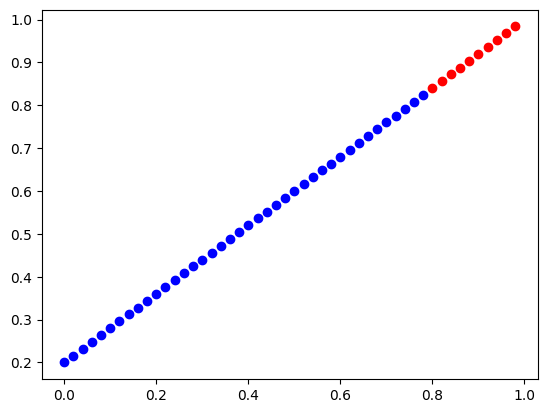

In [5]:
plt.plot(X_train,y_train,'bo')
plt.plot(X_test,y_test,'ro')

### Building a Model

In [6]:
# building a pytorch model
class LinearRegressionModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,requires_grad=True,
                                           dtype=torch.float32))
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True,
                                            dtype=torch.float32))

  def forward(self,x:torch.tensor)->torch.tensor:
    return self.weight *x + self.bias


#### Using Linear layer

In [7]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,out_features=1)

  def forward(self,x:torch.tensor)->torch.tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()

In [8]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [9]:
# set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

### Training the model
* Loss function
* Optimizer
* Training loop
* Testing loop

In [10]:
loss_fn = nn.L1Loss()

#Optimizer

optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.02)



In [17]:
# Training loop

torch.manual_seed(42)

epochs=220

#put data on target device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
  model_1.train()
  # 1. Forward pass
  y_pred = model_1(X_train)

  #2. Calculate loss fn
  loss = loss_fn(y_pred,y_train)
  #3 Optimizer zero grad
  optimizer.zero_grad()

  #4 Loss backward perform backpropagation
  loss.backward()

  #5 Optimizer step
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred,y_test)

  if epoch % 10 == 0:
    print(f"Epoch:{epoch} | Loss:{loss} | Test Loss{test_loss}")

Epoch:0 | Loss:0.01407589577138424 | Test Loss0.005065989680588245
Epoch:10 | Loss:0.01407589577138424 | Test Loss0.005065989680588245
Epoch:20 | Loss:0.01407589577138424 | Test Loss0.005065989680588245
Epoch:30 | Loss:0.01407589577138424 | Test Loss0.005065989680588245
Epoch:40 | Loss:0.01407589577138424 | Test Loss0.005065989680588245
Epoch:50 | Loss:0.01407589577138424 | Test Loss0.005065989680588245
Epoch:60 | Loss:0.01407589577138424 | Test Loss0.005065989680588245
Epoch:70 | Loss:0.01407589577138424 | Test Loss0.005065989680588245
Epoch:80 | Loss:0.01407589577138424 | Test Loss0.005065989680588245
Epoch:90 | Loss:0.01407589577138424 | Test Loss0.005065989680588245
Epoch:100 | Loss:0.01407589577138424 | Test Loss0.005065989680588245
Epoch:110 | Loss:0.01407589577138424 | Test Loss0.005065989680588245
Epoch:120 | Loss:0.01407589577138424 | Test Loss0.005065989680588245
Epoch:130 | Loss:0.01407589577138424 | Test Loss0.005065989680588245
Epoch:140 | Loss:0.01407589577138424 | Test L

In [12]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7844]])),
             ('linear_layer.bias', tensor([0.1920]))])

In [18]:
model_1.eval()

with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[0.8195],
        [0.8352],
        [0.8509],
        [0.8666],
        [0.8823],
        [0.8980],
        [0.9137],
        [0.9293],
        [0.9450],
        [0.9607]])

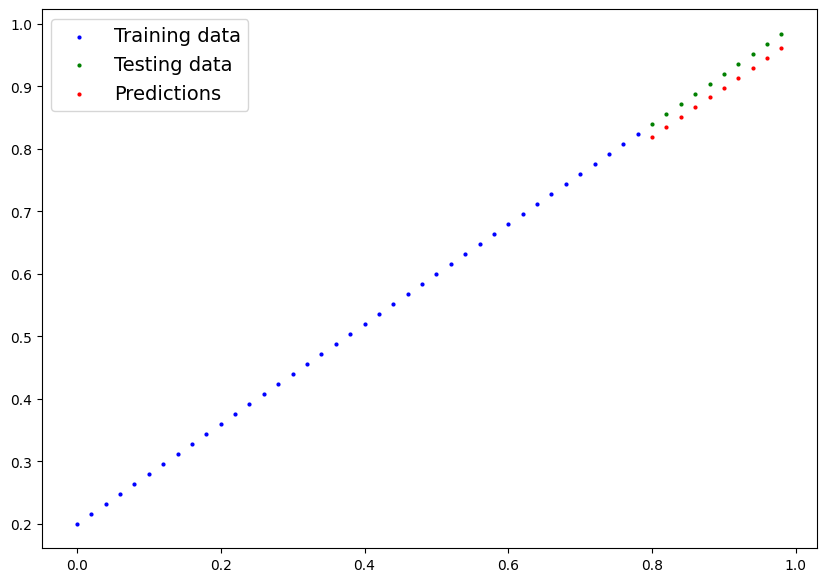

In [19]:
plot_predictions( predictions=y_preds)

In [20]:
from pathlib import Path
#1 models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2 model save path
MODEL_NAME = 'model_1.pt'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

#3. SAVE MODEL STATE DICT

torch.save( obj=model_1.state_dict(),f=MODEL_SAVE_PATH)